<a href="https://colab.research.google.com/github/AirPro/DeepLearning/blob/MethematicalBuildingBlocksChp2/MathematicalBuildingBlocksChp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the dataset minst and verify data

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Create and Define the Model

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential ([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

## Compile the Model

In [10]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Prepare the Image Data

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Fitting the Model

In [12]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 9s 15ms/step - loss: 0.2533 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1029 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0689 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0496 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0380 - accuracy: 0.9887


# Using the Model to Make Predictions

In [13]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 85ms/step


array([5.2319916e-08, 2.2832977e-10, 1.4383122e-06, 2.1341033e-04,
       4.7195841e-12, 3.4841199e-07, 1.2110396e-13, 9.9977827e-01,
       4.4612787e-07, 5.8170099e-06], dtype=float32)

In [14]:
predictions[0].argmax()

7

In [15]:
predictions[0][7]

0.9997783

In [16]:
test_labels[0]

7

# Evaluzting the Model on New Data

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9778
test_acc: 0.9778000116348267


# Data Representation for Neural Networks

## Scalars (rank - 0 tensors)

In [18]:
import numpy as np

x = np.array(12)
x

array(12)

In [19]:
x.ndim

0

## Vectors (rank - 1 tensors)

In [20]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [21]:
x.ndim

1

## Matrices (rank 2 - tensors)

In [22]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])

x.ndim

2

## Rank-3 and Higher-Rank Tensors

In [23]:
from numpy.core.fromnumeric import ndim
x = np.array([[[5,78,3,34,2],
               [6,79,3,35,1],
               [7,80,4,35,2]],
              [[5,78,2,34,6],
               [6,79,3,35,4],
               [22,80,4,5,77]],
              [[5,78,2,34,9],
               [66,3,71,37,8],
               [7,80,4,36,2]]])

x.ndim

3

# Key Attributes (A Look Into the Data in the Tensorflow Datasets)

In [24]:
# load a new set from repository for tensor examination
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
train_images.ndim

3

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_images.dtype

dtype('uint8')

## Display the Fourth Digit

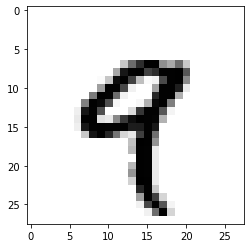

In [28]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [29]:
train_labels[4]

9

Py

# Manipulating Tensors in Num

In [30]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [31]:
# Equivalent to statement above
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[:, 14:, 14: ]
my_slice.shape

(60000, 14, 14)

In [35]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

## The Notion of Data Branches

In [36]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [37]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [38]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

# The gears of neural networks: Tensor operations
## Element Wise Operations

In [40]:
def naive_relu(x):
  assert len(x.shape) == 2  # x is a rank-2 NumPy tensor
  x = x.copy()              # avoid overwritting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [41]:
def naive_add(x, y):
  assert len(x.shape) == 2  # X and y are Rank-2 NumPy tensors
  assert x.shape == y.shape
  x = x.copy()              # avoid overwritting input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [42]:
# Demonstrate the effectiveness of using relu
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.)

print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [43]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)

print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.68 s
